# Part 1: Exploratory Data Analysis

## Part 1.1: Understand the Raw Dataset

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [67]:
credit_risk = 'https://raw.githubusercontent.com/tracysnowf/Deloitte-CapstoneProject/main/data/states_added_data_raw.csv'
df_cr = pd.read_csv(credit_risk, sep = ',')

C:\Users\Xue Feng\AppData\Local\Temp\ipykernel_4484\2166013620.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cr = pd.read_csv(credit_risk, sep = ',')


In [68]:
df_cr.head() # column 0 is redundant

,derived_msa-md,state_code,derived_ethnicity,derived_race,derived_sex,action_taken,preapproval,loan_type,loan_purpose,loan_amount,...,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,washington_dc,waco_tx,chicago_il
0,47894,VA,Not Hispanic or Latino,White,Joint,1,2,1,32,515000.0,...,1828,17.51,114700,100,513,732,29,1,0,0
1,16984,IL,Not Hispanic or Latino,White,Joint,1,2,1,31,405000.0,...,4834,30.10,82000,162,1260,1430,76,0,0,1
2,16984,IL,Not Hispanic or Latino,White,Joint,1,2,1,31,645000.0,...,1625,56.25,82000,81,236,456,76,0,0,1
3,38940,FL,Not Hispanic or Latino,White,Male,1,2,1,1,805000.0,...,1165,13.05,59500,263,401,488,20,0,0,0
4,16984,IL,Not Hispanic or Latino,White,Female,1,2,1,31,925000.0,...,5429,6.56,82000,239,1611,1807,64,0,0,1


In [69]:
# check data info
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490944 entries, 0 to 490943
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   derived_msa-md                     490944 non-null  int64  
 1   state_code                         490408 non-null  object 
 2   derived_ethnicity                  490944 non-null  object 
 3   derived_race                       490944 non-null  object 
 4   derived_sex                        490944 non-null  object 
 5   action_taken                       490944 non-null  int64  
 6   preapproval                        490944 non-null  int64  
 7   loan_type                          490944 non-null  int64  
 8   loan_purpose                       490944 non-null  int64  
 9   loan_amount                        490944 non-null  float64
 10  loan_to_value_ratio                465127 non-null  object 
 11  interest_only_payment              4909

In [70]:
new = df_cr[['derived_ethnicity', 'derived_race', 'derived_sex', "action_taken", "preapproval", "loan_type", "loan_purpose",
            "loan_amount", "loan_to_value_ratio", "interest_only_payment", "balloon_payment", "income", "debt_to_income_ratio",
            "applicant_age", "washington_dc", "waco_tx", "chicago_il"]].copy()
df_cr = new

In [72]:
# check the unique values for each column
df_cr.nunique()

derived_ethnicity            5
derived_race                 9
derived_sex                  4
action_taken                 3
preapproval                  2
loan_type                    4
loan_purpose                 6
loan_amount                748
loan_to_value_ratio      67812
interest_only_payment        3
balloon_payment              3
income                    2134
debt_to_income_ratio        20
applicant_age                9
washington_dc                2
waco_tx                      2
chicago_il                   2
dtype: int64

##### action_taken - Y variable
1 -- Loan originated (the qualification and verification process that begins a new loan.) <br>
2 -- Application approved but not accepted (If the loan was approved before closing but the applicant either failed to respond or the loan was not otherwise closed, then the action taken would be reported as approved but not accepted.) <br>
3 -- Application denied by financial institution <br>

Comments: <br>
category 1 (a typo) might actually be 2(Approved) in the codebook, and 3 stays the same(Disapproved)

In [73]:
pd.unique(df_cr['action_taken'])

array([1, 3, 2], dtype=int64)

In [74]:
# new codebook: 1 - Approved; 0 - Disapproved
# so change all the vlaues of 3 to 0
df_cr['action_taken'].mask((df_cr['action_taken'] == 3), 0, inplace=True)

In [75]:
# drop '2' column
df_cr.drop(df_cr[df_cr['action_taken'] == 2].index, inplace = True)

In [76]:
# check the distribution of target variable action_taken
df_cr.loc[:,'action_taken'].value_counts()

1    376626
0    101157
Name: action_taken, dtype: int64

## Part 1.2: Understand the Features

In [77]:
# understand overall features
df_cr.describe()
# Action Taken:
# 1 -- Loan originated
# 2 -- Application approved but not accepted
# 3 -- Application denied by financial institution

# Preapproval:
# 1 -- Preapproval was requested
# 2 -- Preapproval was not requested

# Loan Type: **75% IQR = 1
# 1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans)
# 2 -- FHA-insured (Federal Housing Administration)
# 3 -- VA-guaranteed (Veterans Administration)
# 4 -- FSA/RHS (Farm Service Agency or Rural Housing Service)

# Loan Purpose: **error data,
# 1 -- Home purchase
# 2 -- Home improvement
# 3 -- Refinancing

# Loan Amount: in thousands of dollars

# interest_only_payment **not in the codebook, 1111？

# balloon_payment **not in the codebook, 1111？

# income: Gross Annual Income: in thousands of dollars **negative/ error data

,action_taken,preapproval,loan_type,loan_purpose,loan_amount,interest_only_payment,balloon_payment,income,washington_dc,waco_tx,chicago_il
count,477783.000000,477783.000000,477783.000000,477783.000000,4.777830e+05,477783.000000,477783.000000,445303.000000,477783.000000,477783.000000,477783.000000
mean,0.788278,1.978685,1.306139,14.510648,3.173176e+05,24.386094,24.431715,139.239338,0.443988,0.014793,0.492899
std,0.408529,0.144433,0.630813,14.805230,1.357526e+06,156.208919,156.202228,1081.834242,0.496853,0.120725,0.499950
min,0.000000,1.000000,1.000000,1.000000,5.000000e+03,1.000000,1.000000,-9126.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,1.350000e+05,2.000000,2.000000,66.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,4.000000,2.450000e+05,2.000000,2.000000,102.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,31.000000,3.850000e+05,2.000000,2.000000,160.000000,1.000000,0.000000,1.000000
max,1.000000,2.000000,4.000000,32.000000,3.275050e+08,1111.000000,1111.000000,520300.000000,1.000000,1.000000,1.000000


### Numerical Features Data Cleaning 

In [78]:
# understand numerical features
# loan_amount look normal, need to clean column loan_to_value_ratio, income
df_cr[["loan_amount", "loan_to_value_ratio", "income"]].describe()

,loan_amount,income
count,4.777830e+05,445303.000000
mean,3.173176e+05,139.239338
std,1.357526e+06,1081.834242
min,5.000000e+03,-9126.000000
25%,1.350000e+05,66.000000
50%,2.450000e+05,102.000000
75%,3.850000e+05,160.000000
max,3.275050e+08,520300.000000


##### loan_to_value_ratio 
Description: The ratio of the total amount of debt secured by the property to the value of the property relied on in making the credit decisiontio. The ratio value should range from 0 - 1.

In [79]:
pd.unique(df_cr['loan_to_value_ratio'])

array(['73.0', '88.0', '61.0', ..., '11.854', '6.774', '7.595'],
      dtype=object)

In [80]:
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'str'>      420656
<class 'float'>     57127
Name: loan_to_value_ratio, dtype: int64

In [81]:
# 607 null values
len(df_cr[pd.to_numeric(df_cr['loan_to_value_ratio'].isnull(),errors='coerce')])

24841

In [82]:
# 159 Exempt values
len(df_cr[(df_cr['loan_to_value_ratio'] == "Exempt")])

9606

In [83]:
# drop 607 null values and 159 Exempt values
df_cr = df_cr[pd.to_numeric(df_cr['loan_to_value_ratio'].notnull(),errors='coerce')]
df_cr = df_cr[(df_cr['loan_to_value_ratio'] != "Exempt")]
# reset index
df_cr = df_cr.reset_index(drop = True)
# cast string types of values to numeric type
df_cr['loan_to_value_ratio'] = pd.to_numeric(df_cr['loan_to_value_ratio'], errors='coerce')

In [84]:
len(df_cr[(df_cr['loan_to_value_ratio'] > 1)])

442792

In [85]:
# check the result
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'float'>    443336
Name: loan_to_value_ratio, dtype: int64

In [86]:
plt.rcParams['figure.dpi'] = 100

##### log_loan_to_value_ratio (NEW column for log reg)
Description: The log of the ratio of the total amount of debt secured by the property to the value of the property relied on in making the credit decisiontio.

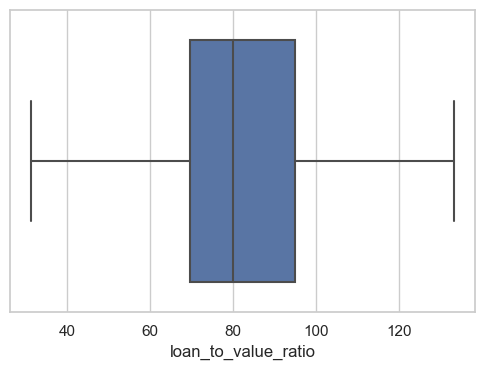

In [87]:
# boxplot shows loan_to_value_ratio (without outliers) is a little left-skewed, so perform the log transformation
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_cr["loan_to_value_ratio"], data = df_cr, showfliers = False)

In [88]:
df_cr['log_loan_to_value_ratio'] = np.log2(df_cr['loan_to_value_ratio'])

##### income (in thousands of dollars)

In [89]:
# 252 null values
len(df_cr[pd.to_numeric(df_cr['income'].isnull(),errors='coerce')])

18673

In [90]:
# 10 negative/ error values, will keep them in the data
len(df_cr[(df_cr['income'] < 0)])

212

In [91]:
# drop 252 null values
df_cr = df_cr[pd.to_numeric(df_cr['income'].notnull(),errors='coerce')]
# reset index
df_cr = df_cr.reset_index(drop = True)

In [92]:
# check the result
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'float'>    424663
Name: loan_to_value_ratio, dtype: int64

#### Cleaned Numeric Features Summary

In [93]:
# understand numeric features
df_cr[["loan_amount", "loan_to_value_ratio", "income"]].describe()

,loan_amount,loan_to_value_ratio,income
count,4.246630e+05,4.246630e+05,424663.000000
mean,2.893564e+05,3.647046e+03,139.748824
std,2.386163e+05,2.324826e+06,1078.633569
min,5.000000e+03,1.300000e-02,-9126.000000
25%,1.350000e+05,6.949000e+01,67.000000
50%,2.450000e+05,8.000000e+01,103.000000
75%,3.750000e+05,9.473000e+01,160.000000
max,1.200500e+07,1.515000e+09,520300.000000


#### Correlation of Numeric Features

In [94]:
# correlation heat map of numerical features
sns.set()

numCol = []
for col in df_cr:
  if df_cr[col].dtype == np.float64:
    numCol.append(col)
corr = df_cr[numCol].corr()

[Text(0.5, 0, 'loan_amount'),
 Text(1.5, 0, 'loan_to_value_ratio'),
 Text(2.5, 0, 'income'),
 Text(3.5, 0, 'log_loan_to_value_ratio')]

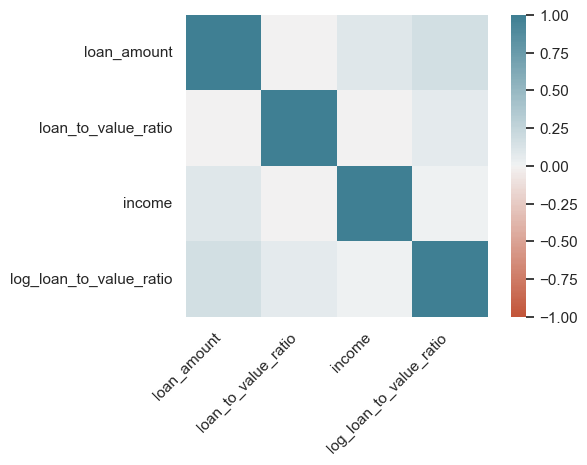

In [95]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [96]:
# check the actual values of correlations
corr_score = df_cr[numCol].corr()
corr_score
# heatmap conclusion: all good, no column needs to be dropped.
# ***but keep in mind that loan_amount and loan_to_value_ratio are not dependent - might need to drop one of them when using linear/ logistic regression

,loan_amount,loan_to_value_ratio,income,log_loan_to_value_ratio
loan_amount,1.000000,-0.001828,0.086368,0.159350
loan_to_value_ratio,-0.001828,1.000000,-0.000093,0.067019
income,0.086368,-0.000093,1.000000,0.017985
log_loan_to_value_ratio,0.159350,0.067019,0.017985,1.000000


### Cleaned Numerical Features -> Categorical Features

##### derived_income (NEW column for income)
INCOME GROUP - INCOME  <br>
Poor or near-poor - \\$32,048 or less <br>
Lower-middle class - \\$32,048 - \\$53,413 <br>
Middle class - \\$53,413 - \\$106,827 <br>
Upper-middle class - \\$106,827 - \\$373,894 <br>
Rich - \\$373,894 and up <br>
(resource: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system)

In [97]:
# bin income into the 5 categories above
# create a list of our conditions
income_conditions = [
    (df_cr['income']*1000 <= 32048),
    (df_cr['income']*1000 > 32048) & (df_cr['income']*1000 <= 53413),
    (df_cr['income']*1000 > 53413) & (df_cr['income']*1000 <= 106827),
    (df_cr['income']*1000 > 106827) & (df_cr['income']*1000 <= 373894),
    (df_cr['income']*1000 > 373894)
    ]

# create a list of the values we want to assign for each condition
# ***income_values = ['Poor and Near Poor', 'Lower-Middle Class', 'Middle Class', 'Upper-Middle Class', 'Rich']
income_values = [1, 2, 3, 4, 5]

# create a new column and use np.select to assign values to it using our lists as arguments
df_cr['derived_income'] = np.select(income_conditions, income_values)

<AxesSubplot:>

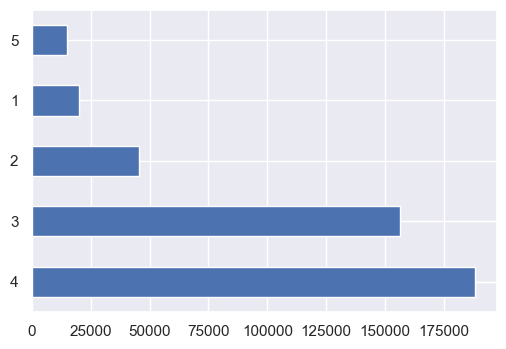

In [98]:
# explore derived_income category
df_cr["derived_income"].value_counts().plot(kind='barh')

##### derived_loan_to_value_ratio (NEW column for loan_to_value_ratio)
Conventional bar - 80% or less <br>
FHA bar -	96.5% or less <br>
VA bar - 100% or less <br>
Not eligible - > 100%
(resource: https://www.forbes.com/advisor/mortgages/loan-to-value-ratio/)

In [99]:
# bin loan_to_value_ratio into the 4 categories above
# create a list of our conditions
loan_to_value_ratio_conditions = [
    (df_cr['loan_to_value_ratio'] <= 80),
    (df_cr['loan_to_value_ratio'] > 80) & (df_cr['loan_to_value_ratio'] <= 96.5),
    (df_cr['loan_to_value_ratio'] > 96.5) & (df_cr['loan_to_value_ratio'] <= 100),
    (df_cr['loan_to_value_ratio'] > 100)
    ]

# create a list of the values we want to assign for each condition
# *** loan_to_value_ratio_values = ['< Conventional Bar', '> Conventional Bar and < FHA Bar', '> FHA Bar and < VA Bar', 'Not Eligible']
loan_to_value_ratio_values = [2, 3, 4, 1]
# create a new column and use np.select to assign values to it using our lists as arguments
df_cr['derived_loan_to_value_ratio'] = np.select(loan_to_value_ratio_conditions, loan_to_value_ratio_values)

<AxesSubplot:>

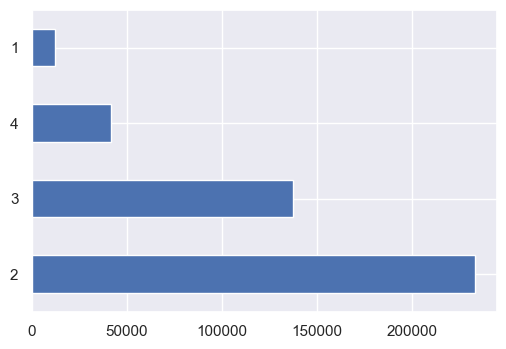

In [100]:
# explore derived_loan_to_value_ratio category
df_cr["derived_loan_to_value_ratio"].value_counts().plot(kind='barh')

### Categorical Features Data Cleaning 

##### interest_only_payment
Description: Whether the contractual terms include, or would have included, interest-only payments
Values: <br>
1 - Interest-only payments <br>
2 - No interest-only payments <br>
1111 - Exempt <br>

NEW: <br>
1 -> Interest-only Payments <br>
2 -> No Interest-only Payments

In [106]:
# replace "Exempt" with NAs
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 1111), None, inplace=True)

In [107]:
# drop null values
df_cr = df_cr[pd.to_numeric(df_cr['interest_only_payment'].notnull(),errors='coerce')]

In [108]:
# reset index
df_cr = df_cr.reset_index(drop = True)

In [109]:
# *** # rename
# df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 1), 'Interest-only Payments', inplace=True)
# df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 2), 'No Interest-only Payments', inplace=True)

# rename
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 1), 1, inplace=True)
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 2), 0, inplace=True)


<AxesSubplot:>

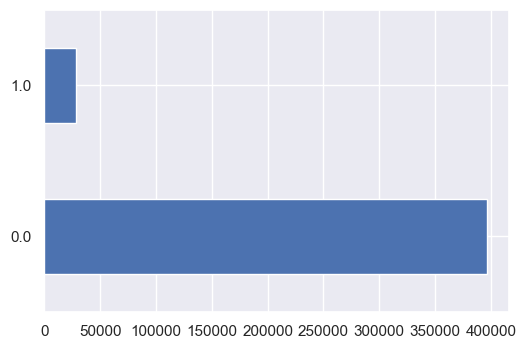

In [110]:
# explore interest_only_payment category
df_cr["interest_only_payment"].value_counts().plot(kind='barh')

##### balloon_payment
Description: Whether the contractual terms include, or would have included, a balloon payment
Values: <br>
1 - Balloon payment <br>
2 - No balloon payment <br>
1111 - Exempt <br>

NEW: <br>
1 -> Balloon Payment <br>
2 -> No Balloon Payment

In [111]:
# replace "Exempt" with NAs
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 'Exempt'), None, inplace=True)

In [112]:
# drop null values
df_cr = df_cr[pd.to_numeric(df_cr['balloon_payment'].notnull(),errors='coerce')]

In [113]:
# reset index
df_cr = df_cr.reset_index(drop = True)

In [114]:
# ***# rename
# df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 1), 'Balloon Payment', inplace=True)
# df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 2), 'No Balloon Payment', inplace=True)

# rename
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 1), 1, inplace=True)
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 2), 0, inplace=True)

<AxesSubplot:>

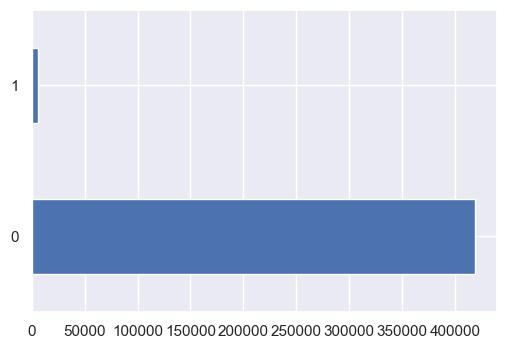

In [115]:
# explore balloon_payment category
df_cr["balloon_payment"].value_counts().plot(kind='barh')

##### preapproval_requested (old: preapproval)
1 -- Preapproval was requested <br>
2 -- Preapproval was not requested <br>

NEW: <br>
Preapprove Requested - Preapproval was requested <br>
No Preapprove Requested - Preapproval was not requested <br>

rename column: preapproval -> preapproval_requested

In [116]:
# *** rename
# df_cr['preapproval'].mask((df_cr['preapproval'] == 1), "Preapproval Requested", inplace=True)
# df_cr['preapproval'].mask((df_cr['preapproval'] == 2), "No Preapproval Requested", inplace=True)

# rename
df_cr['preapproval'].mask((df_cr['preapproval'] == 1), 1, inplace=True)
df_cr['preapproval'].mask((df_cr['preapproval'] == 2), 0, inplace=True)

In [117]:
# change column name 'preapproval' -> 'preapproval_requested'
df_cr.rename(columns={'preapproval': 'preapproval_requested'}, inplace=True)

<AxesSubplot:>

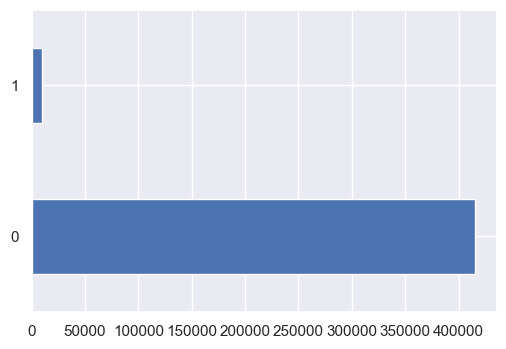

In [118]:
# explore loan_type category
df_cr["preapproval_requested"].value_counts().plot(kind='barh')

##### loan_type
1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans) <br>
2 -- FHA-insured (Federal Housing Administration) <br>
3 -- VA-guaranteed (Veterans Administration) <br>
4 -- FSA/RHS (Farm Service Agency or Rural Housing Service) <br>

Comments: <br>
75% IQR = 1 <br>
About 90% of the whole loan type is type 1 - Conventional among the 4 types. <br>
Is this data representative to the whole population? <br>
possible research directions: if people with a Conventional loan type have an obviously higher/lower chance to get approved for the loan compared to people with a NON Conventional loan type?

In [119]:
# changed 1, 2, 3, 4 to their corresponding categorical names
# df_cr['loan_type'].mask((df_cr['loan_type'] == 1), 'Converntional', inplace=True)
# df_cr['loan_type'].mask((df_cr['loan_type'] == 2), 'FHA-insured', inplace=True)
# df_cr['loan_type'].mask((df_cr['loan_type'] == 3), 'VA-guaranteed', inplace=True)
# df_cr['loan_type'].mask((df_cr['loan_type'] == 4), 'FSA/RHS', inplace=True)

In [120]:
# len(df_cr[df_cr['loan_type'] == 'Converntional']) / len(df_cr['loan_type'])

In [121]:
# *** number of 'FSA/RHS' is only 2, not representative, so drop this category
# len(df_cr[df_cr['loan_type'] == 'FSA/RHS'])

# number of 'FSA/RHS' is only 2, not representative, so drop this category
len(df_cr[df_cr['loan_type'] == 4])

1217

In [122]:
# *** drop 'FSA/RHS' column
# df_cr.drop(df_cr[df_cr['loan_type'] == 'FSA/RHS'].index, inplace = True)

# drop 'FSA/RHS' column
df_cr.drop(df_cr[df_cr['loan_type'] == 2].index, inplace = True)

In [123]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

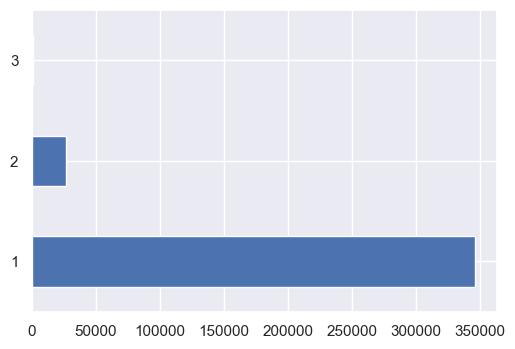

In [124]:
# 3, 4 -> 2,3 
df_cr['loan_type'].mask((df_cr['loan_type'] == 3), 2, inplace=True)
df_cr['loan_type'].mask((df_cr['loan_type'] == 4), 3, inplace=True)

# explore loan_type category
df_cr["loan_type"].value_counts().plot(kind='barh')

##### loan_purpose 
Description: The purpose of covered loan or application
Values: <br>
1 - Home purchase <br>
2 - Home improvement <br>
31 - Refinancing <br>
32 - Cash-out refinancing <br>
4 - Other purpose <br>
5 - Not applicable 

CHANGE - 31, 32 -> 3 - Refinancing; dropped 19 values of "not applicable" 

In [125]:
df_cr["loan_purpose"].replace([31, 32], 3, regex=False, inplace=True)

In [126]:
# 19 values of "not applicable" 
len(df_cr[df_cr['loan_purpose'] == 5])

205

In [127]:
# 5 -> NAs
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 5), None, inplace=True)

In [128]:
# drop 19 values
df_cr = df_cr[pd.to_numeric(df_cr['loan_purpose'].notnull(),errors='coerce')]

In [129]:
# changed 1, 2, 3, 4, 5 to their corresponding categorical names
# df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 1), 'Home Purchase', inplace=True)
# df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 2), 'Home Improvement', inplace=True)
# df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 3), 'Refinancing', inplace=True)
# df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 4), 'Other Purpose', inplace=True)

In [130]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

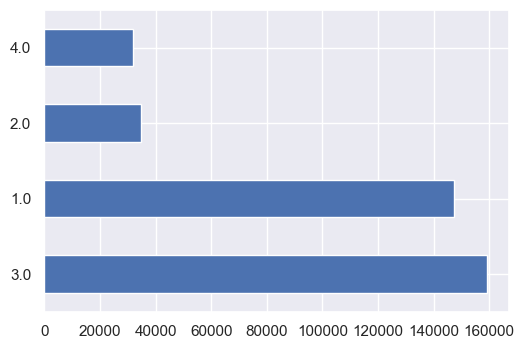

In [131]:
# explore loan_purpose category
df_cr["loan_purpose"].value_counts().plot(kind='barh')

##### is_not_hispanic (old: derived_ethnicity)

In [132]:
pd.unique(df_cr['derived_ethnicity'])

array(['Not Hispanic or Latino', 'Joint', 'Hispanic or Latino',
       'Ethnicity Not Available', 'Free Form Text Only'], dtype=object)

In [133]:
# Convert 'Joint', 'Ethnicity Not Available', 'Free Form Text Only' to NAs
df_cr['derived_ethnicity'].mask((df_cr['derived_ethnicity'] == 'Joint') |
                                (df_cr['derived_ethnicity'] == 'Ethnicity Not Available') |
                                (df_cr['derived_ethnicity'] == 'Free Form Text Only'), None, inplace=True)

In [134]:
df_cr['derived_ethnicity'].map(type).value_counts()

<class 'str'>         310731
<class 'NoneType'>     62670
Name: derived_ethnicity, dtype: int64

In [135]:
# drop 1878 null values
df_cr = df_cr[pd.to_numeric(df_cr['derived_ethnicity'].notnull(),errors='coerce')]

In [136]:
df_cr['derived_ethnicity'].map(type).value_counts()

<class 'str'>    310731
Name: derived_ethnicity, dtype: int64

In [137]:
# change column name 'derived_ethnicity' -> 'is_not_hispanic'
df_cr.rename(columns={'derived_ethnicity': 'is_not_hispanic'}, inplace=True)

In [138]:
df_cr['is_not_hispanic'].mask((df_cr['is_not_hispanic'] == "Hispanic or Latino"), 1, inplace=True)
df_cr['is_not_hispanic'].mask((df_cr['is_not_hispanic'] == "Not Hispanic or Latino"), 0, inplace=True)

In [139]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

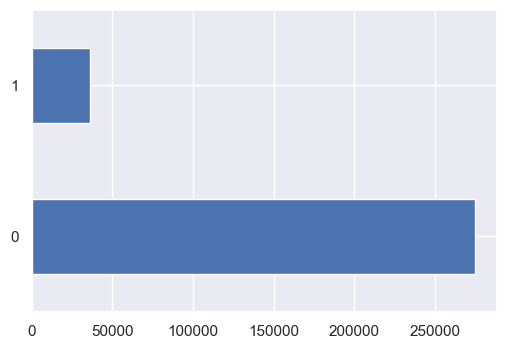

In [140]:
# explore is_not_hispanic category
df_cr["is_not_hispanic"].value_counts().plot(kind='barh')

##### derived_race

In [141]:
pd.unique(df_cr['derived_race'])

array(['White', 'Joint', 'Asian', 'Black or African American',
       'Race Not Available', '2 or more minority races',
       'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander', 'Free Form Text Only'],
      dtype=object)

In [142]:
# Convert '2 or more minority races', 'Race Not Available','American Indian or Alaska Native', 
# 'Joint', 'Native Hawaiian or Other Pacific Islander' to 'Minority Race/(s/)'
df_cr['derived_race'].mask((df_cr['derived_race'] == '2 or more minority races') |
                            (df_cr['derived_race'] == 'American Indian or Alaska Native') |
                            (df_cr['derived_race'] == 'Joint') |
                            (df_cr['derived_race'] == 'Native Hawaiian or Other Pacific Islander'), "Minority Races", inplace=True)

In [143]:
df_cr['derived_race'].mask((df_cr['derived_race'] == 'Free Form Text Only') |
                           (df_cr['derived_race'] == 'Race Not Available'), None, inplace=True)

In [144]:
df_cr['derived_race'].map(type).value_counts()

<class 'str'>         300863
<class 'NoneType'>      9868
Name: derived_race, dtype: int64

In [145]:
pd.unique(df_cr['derived_race'])

array(['White', 'Minority Races', 'Asian', 'Black or African American',
       None], dtype=object)

In [146]:
# drop 526 null values
df_cr = df_cr[pd.to_numeric(df_cr['derived_race'].notnull(),errors='coerce')]

In [147]:
pd.unique(df_cr['derived_race'])

array(['White', 'Minority Races', 'Asian', 'Black or African American'],
      dtype=object)

In [148]:
df_cr['derived_race'].mask((df_cr['derived_race'] == "White"), 1, inplace=True)
df_cr['derived_race'].mask((df_cr['derived_race'] == "Asian"), 2, inplace=True)
df_cr['derived_race'].mask((df_cr['derived_race'] == "Black or African American"), 3, inplace=True)
df_cr['derived_race'].mask((df_cr['derived_race'] == "Minority Races"), 4, inplace=True)

In [149]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

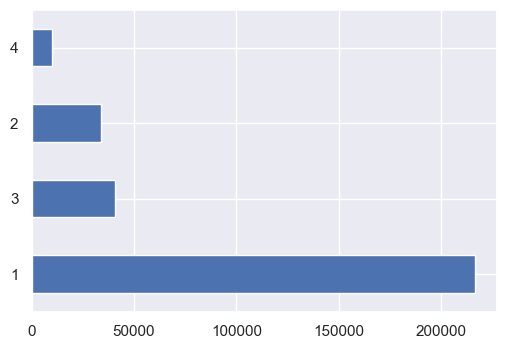

In [150]:
# explore derived_race category
df_cr["derived_race"].value_counts().plot(kind='barh')

##### is_male (old: derived_sex)

In [151]:
pd.unique(df_cr['derived_sex']) # OK

array(['Joint', 'Male', 'Female', 'Sex Not Available'], dtype=object)

In [152]:
# change column name 'derived_sex' -> 'is_male'
df_cr.rename(columns={'derived_sex': 'is_male'}, inplace=True)

In [153]:
df_cr['is_male'].mask((df_cr['is_male'] == "Male"), 1, inplace=True)
df_cr['is_male'].mask((df_cr['is_male'] == "Female"), 0, inplace=True)

In [157]:
# drop 'Sex Not Available' column
df_cr.drop(df_cr[df_cr['is_male'] == "Sex Not Available"].index, inplace = True)
# drop 'Joint' column
df_cr.drop(df_cr[df_cr['is_male'] == "Joint"].index, inplace = True)

<AxesSubplot:>

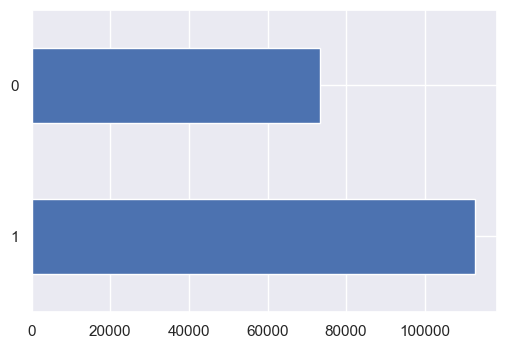

In [158]:
# explore is_male category
df_cr["is_male"].value_counts().plot(kind='barh')

##### debt_to_income_ratio 
Description: The ratio, as a percentage, of the applicant’s or borrower’s total monthly debt to the total monthly income relied on in making the credit decision

In [159]:
pd.unique(df_cr['debt_to_income_ratio']) # should create a new column: 36% - 49%, Exempt = NaN?

array(['30%-<36%', '36%-<50%', '20%-<30%', '>60%', '<20%', '50%-60%', nan,
       'Exempt'], dtype=object)

In [160]:
df_cr["debt_to_income_ratio"].replace(['48', '44', '38', '42', '40', '36', '49', '47', '43', '41', '39', '46', '37', '45'], '36%-<50%', regex=False, inplace=True)

In [161]:
# replace "Exempt" with NAs
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == 'Exempt'), None, inplace=True)

In [162]:
# drop null values
df_cr = df_cr[pd.to_numeric(df_cr['debt_to_income_ratio'].notnull(),errors='coerce')]

In [163]:
pd.unique(df_cr['debt_to_income_ratio'])

array(['30%-<36%', '36%-<50%', '20%-<30%', '>60%', '<20%', '50%-60%'],
      dtype=object)

In [164]:
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "<20%"), 1, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "20%-<30%"), 2, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "30%-<36%"), 3, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "36%-<50%"), 4, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "50%-60%"), 5, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == ">60%"), 6, inplace=True)

In [165]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

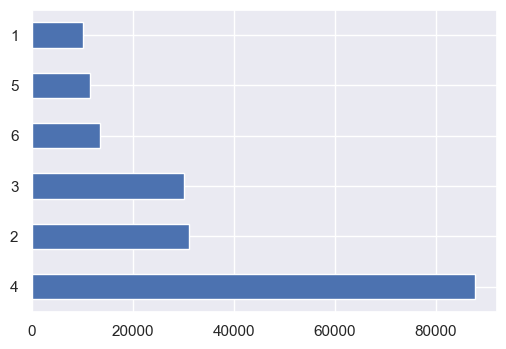

In [166]:
# explore debt_to_income_ratio category
df_cr["debt_to_income_ratio"].value_counts().plot(kind='barh')

##### mid_debt_to_income_ratio  (NEW column for log reg)
Description: Mid values (it's neither median nor average because of lack of info) of the categorical variable debt_to_income_ratio

In [167]:
r_conditions = [
    df_cr['debt_to_income_ratio'] == '<20%',
    df_cr['debt_to_income_ratio'] == '20%-<30%',
    df_cr['debt_to_income_ratio'] == '30%-<36%',
    df_cr['debt_to_income_ratio'] == '36%-<50%',
    df_cr['debt_to_income_ratio'] == '50%-60%',
    df_cr['debt_to_income_ratio'] == '>60%'
]

r_choices = [0.15, 0.25, 0.33, 0.38, 0.55, 0.65]

df_cr['mid_debt_to_income_ratio'] = np.select(r_conditions, r_choices, default=0)

In [168]:
# # explore mid_debt_to_income_ratio category
# df_cr["mid_debt_to_income_ratio"].value_counts().plot(kind='barh')

##### debt  (NEW column for log reg)
Description: debt = mid_debt_to_income_ratio * income

In [169]:
df_cr['debt'] = np.multiply(df_cr['mid_debt_to_income_ratio'], df_cr['income'])

##### applicant_age
Young Adult - 18 - 34 <br>
Middle-Aged Adult - 35-54 <br>
Older Adult - > 55 <br>
(resource: https://academic.oup.com/gerontologist/article/42/1/92/641498)

In [170]:
pd.unique(df_cr['applicant_age']) # 8888
# df_cr[(df_cr['applicant_age'] == '8888')] # print 4 rows with age = 8888

array(['55-64', '35-44', '65-74', '>74', '45-54', '25-34', '<25', '8888'],
      dtype=object)

In [171]:
# drop rows with 8888
df_cr.drop(df_cr.index[df_cr['applicant_age'] == '8888'], inplace=True)

In [172]:
pd.unique(df_cr['applicant_age'])

array(['55-64', '35-44', '65-74', '>74', '45-54', '25-34', '<25'],
      dtype=object)

In [173]:
# reset index
df_cr = df_cr.reset_index(drop = True)

In [174]:
age_conditions = [
    (df_cr['applicant_age'] == '<25') | (df_cr['applicant_age'] == '25-34'),
    (df_cr['applicant_age'] == '35-44') | (df_cr['applicant_age'] == '45-54'),
    (df_cr['applicant_age'] == '55-64') | (df_cr['applicant_age'] == '65-74') | (df_cr['applicant_age'] == '>74')
]

# *** age_choices = ['Young', 'Middle-Aged', 'Older']
age_choices = [1, 2, 3]

df_cr['applicant_age'] = np.select(age_conditions, age_choices, default=0)

<AxesSubplot:>

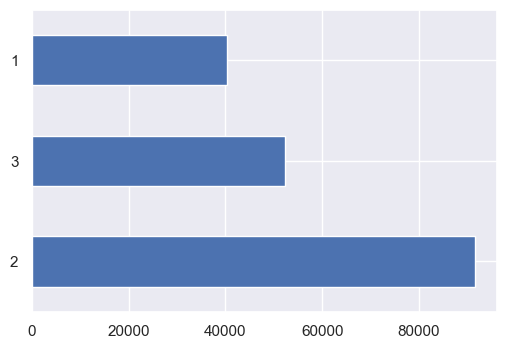

In [175]:
# explore applicant_age category
df_cr["applicant_age"].value_counts().plot(kind='barh')

In [178]:
# cleaned dataset info
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184209 entries, 0 to 184208
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   is_not_hispanic              184209 non-null  object 
 1   derived_race                 184209 non-null  object 
 2   is_male                      184209 non-null  object 
 3   action_taken                 184209 non-null  int64  
 4   preapproval_requested        184209 non-null  int64  
 5   loan_type                    184209 non-null  int64  
 6   loan_purpose                 184209 non-null  float64
 7   loan_amount                  184209 non-null  float64
 8   loan_to_value_ratio          184209 non-null  float64
 9   interest_only_payment        184209 non-null  float64
 10  balloon_payment              184209 non-null  int64  
 11  income                       184209 non-null  float64
 12  debt_to_income_ratio         184209 non-null  object 
 13 

In [179]:
df_cr

,is_not_hispanic,derived_race,is_male,action_taken,preapproval_requested,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,...,debt_to_income_ratio,applicant_age,washington_dc,waco_tx,chicago_il,log_loan_to_value_ratio,derived_income,derived_loan_to_value_ratio,mid_debt_to_income_ratio,debt
0,0,1,1,1,0,1,1.0,805000.0,61.000,0.0,...,3,3,0,0,0,5.930737,5,2,0.0,0.0
1,0,1,0,1,0,1,3.0,925000.0,78.000,0.0,...,3,2,0,0,1,6.285402,4,2,0.0,0.0
2,0,1,0,1,0,1,1.0,1235000.0,80.000,0.0,...,3,3,1,0,0,6.321928,5,2,0.0,0.0
3,0,1,1,1,0,2,3.0,205000.0,35.548,0.0,...,4,3,1,0,0,5.151696,3,2,0.0,0.0
4,0,1,1,1,0,1,1.0,305000.0,95.000,0.0,...,4,2,0,0,0,6.569856,4,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184204,1,1,1,1,0,1,1.0,245000.0,97.000,0.0,...,4,2,1,0,0,6.599913,2,4,0.0,0.0
184205,0,4,1,1,0,1,3.0,755000.0,80.000,0.0,...,2,3,1,0,0,6.321928,4,2,0.0,0.0
184206,0,1,0,1,0,1,1.0,895000.0,85.000,0.0,...,4,1,1,0,0,6.409391,4,3,0.0,0.0
184207,0,1,0,1,0,1,3.0,1315000.0,70.000,0.0,...,4,2,0,0,1,6.129283,5,2,0.0,0.0


#### Understand Numerical Feature Distribution
##### loan_amount, loan_to_value_ratio, income

<AxesSubplot:xlabel='action_taken', ylabel='loan_to_value_ratio'>

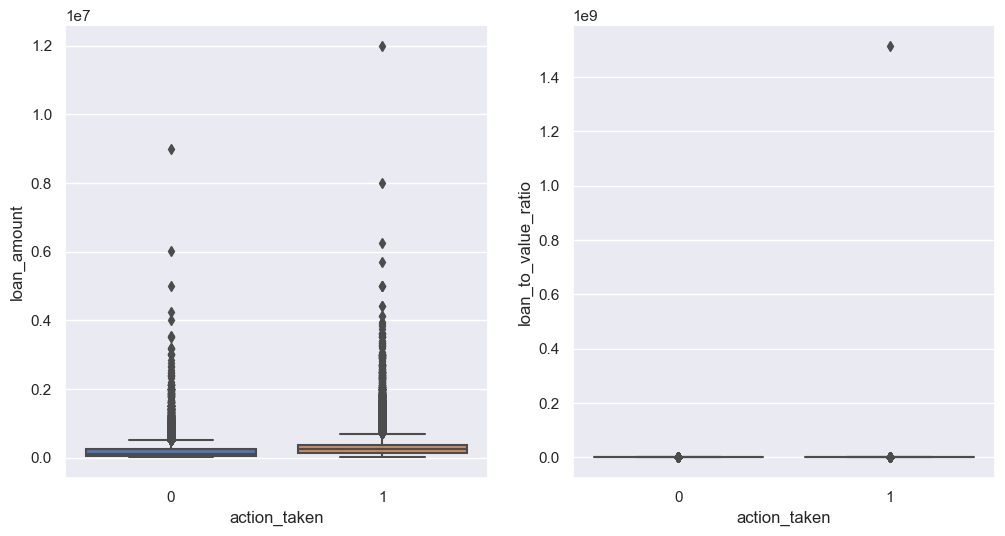

In [180]:
_,axs = plt.subplots(1,2, figsize=[12,6])
_.title = "title"
sns.boxplot(x='action_taken', y='loan_amount', data=df_cr, ax=axs[0])
sns.boxplot(x='action_taken', y='loan_to_value_ratio', data=df_cr, ax=axs[1])

<AxesSubplot:xlabel='action_taken', ylabel='debt'>

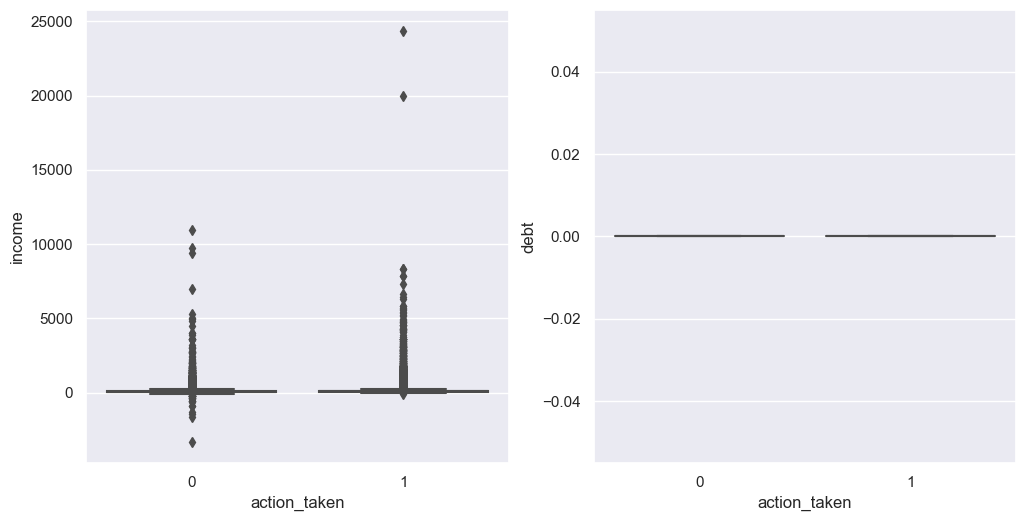

In [181]:
 _,axs = plt.subplots(1,2, figsize=[12,6])
sns.boxplot(x='action_taken', y='income', data=df_cr, ax=axs[0])
sns.boxplot(x='action_taken', y='debt', data=df_cr, ax=axs[1])

#### Understand Categorical Feature Distribution
##### derived_income, derived_loan_to_value_ratio, debt, derived_ethnicity, derived_race, interest_only_payment, balloon_payment, derived_sex, preapproval, loan_type,  loan_purpose

<AxesSubplot:xlabel='action_taken', ylabel='count'>

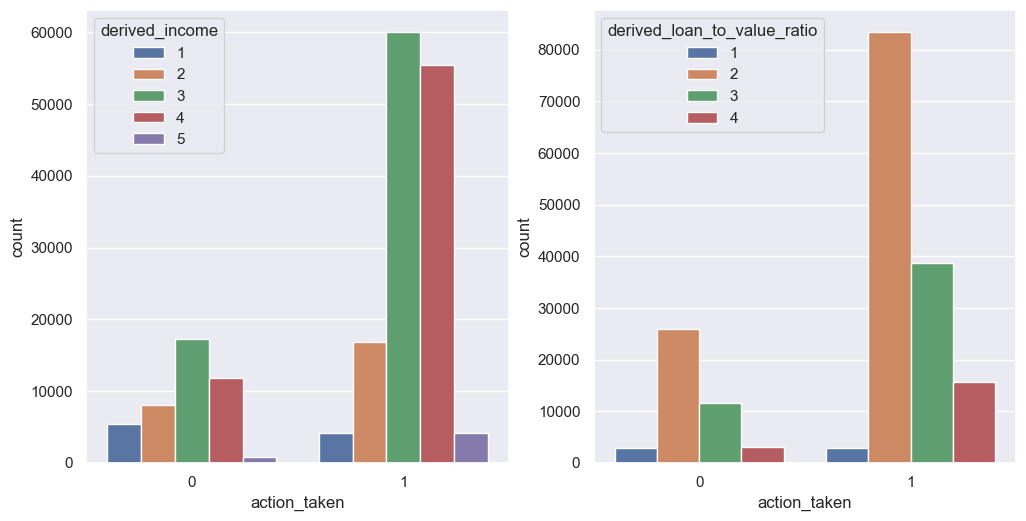

In [182]:
 _,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='derived_income', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='derived_loan_to_value_ratio', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

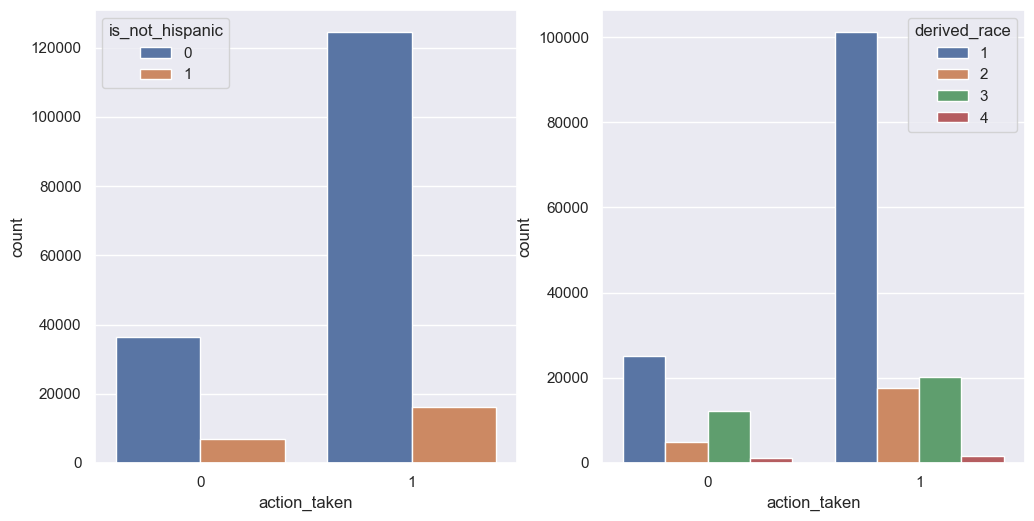

In [183]:
 _,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='is_not_hispanic', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='derived_race', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

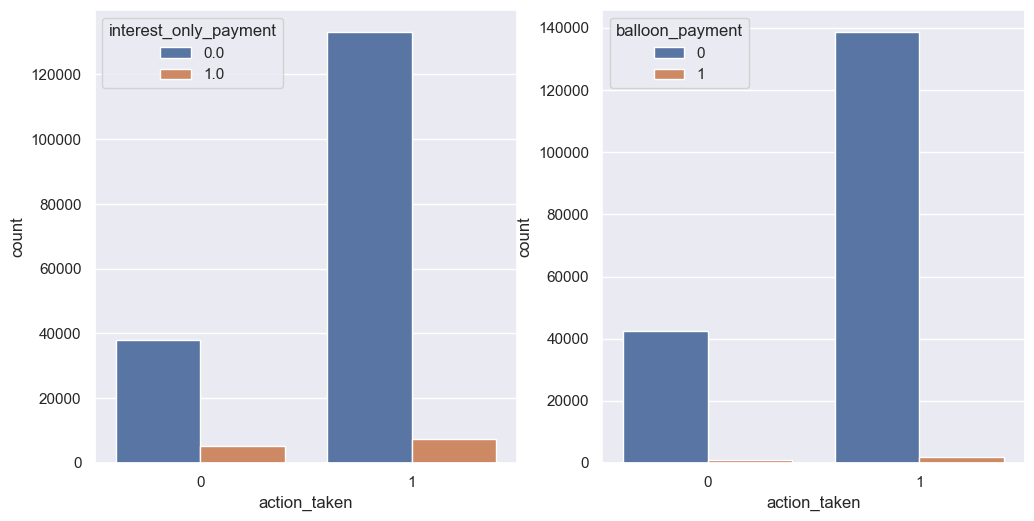

In [184]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='interest_only_payment', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='balloon_payment', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

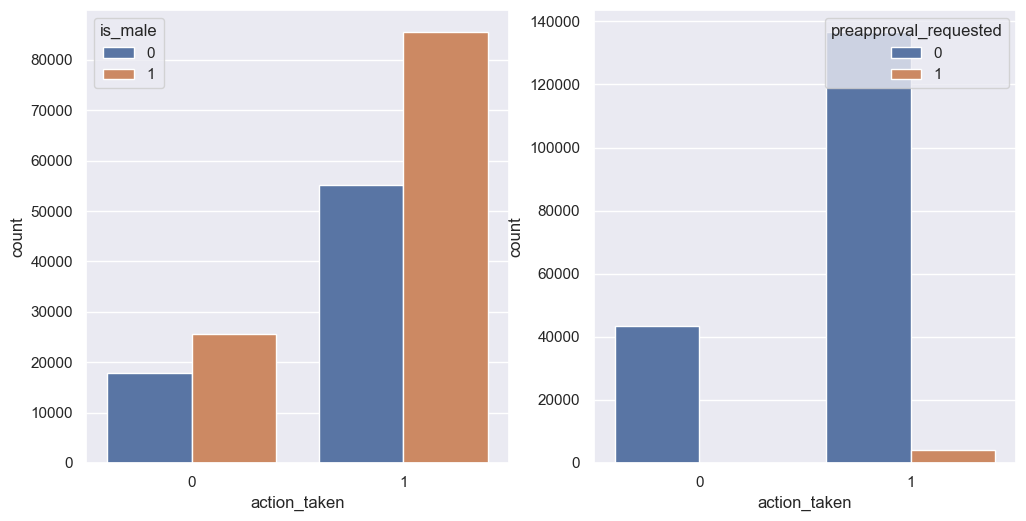

In [185]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='is_male', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='preapproval_requested', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

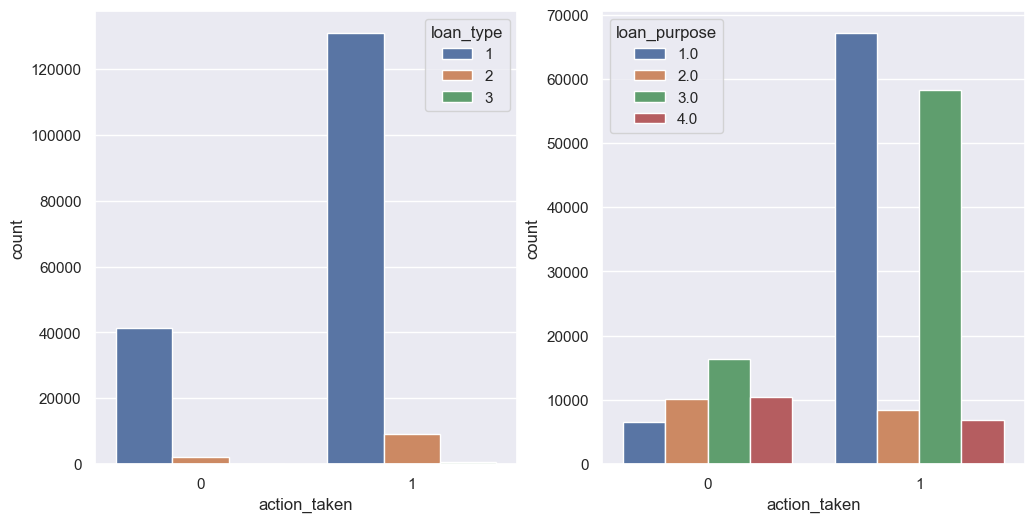

In [186]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='loan_type', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='loan_purpose', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

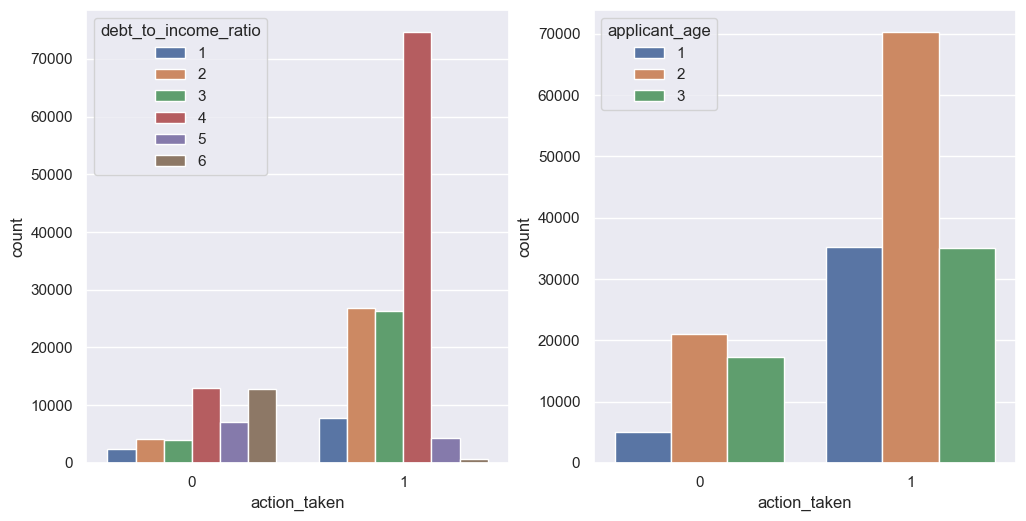

In [187]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='debt_to_income_ratio', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='applicant_age', data=df_cr, ax=axss[1])

In [188]:
df_cr

,is_not_hispanic,derived_race,is_male,action_taken,preapproval_requested,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,...,debt_to_income_ratio,applicant_age,washington_dc,waco_tx,chicago_il,log_loan_to_value_ratio,derived_income,derived_loan_to_value_ratio,mid_debt_to_income_ratio,debt
0,0,1,1,1,0,1,1.0,805000.0,61.000,0.0,...,3,3,0,0,0,5.930737,5,2,0.0,0.0
1,0,1,0,1,0,1,3.0,925000.0,78.000,0.0,...,3,2,0,0,1,6.285402,4,2,0.0,0.0
2,0,1,0,1,0,1,1.0,1235000.0,80.000,0.0,...,3,3,1,0,0,6.321928,5,2,0.0,0.0
3,0,1,1,1,0,2,3.0,205000.0,35.548,0.0,...,4,3,1,0,0,5.151696,3,2,0.0,0.0
4,0,1,1,1,0,1,1.0,305000.0,95.000,0.0,...,4,2,0,0,0,6.569856,4,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184204,1,1,1,1,0,1,1.0,245000.0,97.000,0.0,...,4,2,1,0,0,6.599913,2,4,0.0,0.0
184205,0,4,1,1,0,1,3.0,755000.0,80.000,0.0,...,2,3,1,0,0,6.321928,4,2,0.0,0.0
184206,0,1,0,1,0,1,1.0,895000.0,85.000,0.0,...,4,1,1,0,0,6.409391,4,3,0.0,0.0
184207,0,1,0,1,0,1,3.0,1315000.0,70.000,0.0,...,4,2,0,0,1,6.129283,5,2,0.0,0.0


In [189]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184209 entries, 0 to 184208
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   is_not_hispanic              184209 non-null  object 
 1   derived_race                 184209 non-null  object 
 2   is_male                      184209 non-null  object 
 3   action_taken                 184209 non-null  int64  
 4   preapproval_requested        184209 non-null  int64  
 5   loan_type                    184209 non-null  int64  
 6   loan_purpose                 184209 non-null  float64
 7   loan_amount                  184209 non-null  float64
 8   loan_to_value_ratio          184209 non-null  float64
 9   interest_only_payment        184209 non-null  float64
 10  balloon_payment              184209 non-null  int64  
 11  income                       184209 non-null  float64
 12  debt_to_income_ratio         184209 non-null  object 
 13 

In [191]:
df_cr = df_cr.drop(columns=['income','log_loan_to_value_ratio', 'mid_debt_to_income_ratio', 'debt', 'loan_amount'])

KeyError: "['income', 'log_loan_to_value_ratio', 'mid_debt_to_income_ratio', 'debt', 'loan_amount'] not found in axis"

In [192]:
df_cr.rename(columns={'derived_income': 'income'}, inplace=True)
df_cr.rename(columns={'derived_race': 'race'}, inplace=True)
df_cr.rename(columns={'is_not_hispanic': 'ethnicity'}, inplace=True)
df_cr.rename(columns={'is_male': 'gender'}, inplace=True)
df_cr.rename(columns={'applicant_age': 'age'}, inplace=True)

In [193]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184209 entries, 0 to 184208
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ethnicity                    184209 non-null  object 
 1   race                         184209 non-null  object 
 2   gender                       184209 non-null  object 
 3   action_taken                 184209 non-null  int64  
 4   preapproval_requested        184209 non-null  int64  
 5   loan_type                    184209 non-null  int64  
 6   loan_purpose                 184209 non-null  float64
 7   loan_to_value_ratio          184209 non-null  float64
 8   interest_only_payment        184209 non-null  float64
 9   balloon_payment              184209 non-null  int64  
 10  debt_to_income_ratio         184209 non-null  object 
 11  age                          184209 non-null  int32  
 12  washington_dc                184209 non-null  int64  
 13 

In [ ]:
# df_cr.to_csv('data/Fairlearn.csv', index = False)

In [194]:
df_dc = df_cr[df_cr['washington_dc'] == 1]
df_dc.drop(['washington_dc', 'waco_tx', 'chicago_il'], axis=1, inplace=True)
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78154 entries, 2 to 184206
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ethnicity                    78154 non-null  object 
 1   race                         78154 non-null  object 
 2   gender                       78154 non-null  object 
 3   action_taken                 78154 non-null  int64  
 4   preapproval_requested        78154 non-null  int64  
 5   loan_type                    78154 non-null  int64  
 6   loan_purpose                 78154 non-null  float64
 7   loan_to_value_ratio          78154 non-null  float64
 8   interest_only_payment        78154 non-null  float64
 9   balloon_payment              78154 non-null  int64  
 10  debt_to_income_ratio         78154 non-null  object 
 11  age                          78154 non-null  int32  
 12  income                       78154 non-null  int32  
 13  derived_loan_to

C:\Users\Xue Feng\AppData\Local\Temp\ipykernel_4484\2916860739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc.drop(['washington_dc', 'waco_tx', 'chicago_il'], axis=1, inplace=True)


In [195]:
df_tx = df_cr[df_cr['waco_tx'] == 1]
df_tx.drop(['washington_dc', 'waco_tx', 'chicago_il'], axis=1, inplace=True)
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 28 to 180387
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ethnicity                    1749 non-null   object 
 1   race                         1749 non-null   object 
 2   gender                       1749 non-null   object 
 3   action_taken                 1749 non-null   int64  
 4   preapproval_requested        1749 non-null   int64  
 5   loan_type                    1749 non-null   int64  
 6   loan_purpose                 1749 non-null   float64
 7   loan_to_value_ratio          1749 non-null   float64
 8   interest_only_payment        1749 non-null   float64
 9   balloon_payment              1749 non-null   int64  
 10  debt_to_income_ratio         1749 non-null   object 
 11  age                          1749 non-null   int32  
 12  income                       1749 non-null   int32  
 13  derived_loan_to

C:\Users\Xue Feng\AppData\Local\Temp\ipykernel_4484\2360310922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tx.drop(['washington_dc', 'waco_tx', 'chicago_il'], axis=1, inplace=True)


In [196]:
df_il = df_cr[df_cr['chicago_il'] == 1]
df_il.drop(['washington_dc', 'waco_tx', 'chicago_il'], axis=1, inplace=True)
df_il.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95874 entries, 1 to 184208
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ethnicity                    95874 non-null  object 
 1   race                         95874 non-null  object 
 2   gender                       95874 non-null  object 
 3   action_taken                 95874 non-null  int64  
 4   preapproval_requested        95874 non-null  int64  
 5   loan_type                    95874 non-null  int64  
 6   loan_purpose                 95874 non-null  float64
 7   loan_to_value_ratio          95874 non-null  float64
 8   interest_only_payment        95874 non-null  float64
 9   balloon_payment              95874 non-null  int64  
 10  debt_to_income_ratio         95874 non-null  object 
 11  age                          95874 non-null  int32  
 12  income                       95874 non-null  int32  
 13  derived_loan_to

C:\Users\Xue Feng\AppData\Local\Temp\ipykernel_4484\4136729589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_il.drop(['washington_dc', 'waco_tx', 'chicago_il'], axis=1, inplace=True)


In [197]:
# FL Dataset
df_fl = df_cr[(df_cr['chicago_il'] == 0) & (df_cr['waco_tx'] == 0) & (df_cr['washington_dc'] == 0)]
df_fl.drop(['washington_dc', 'waco_tx', 'chicago_il'], axis=1, inplace=True)
df_fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8432 entries, 0 to 184201
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ethnicity                    8432 non-null   object 
 1   race                         8432 non-null   object 
 2   gender                       8432 non-null   object 
 3   action_taken                 8432 non-null   int64  
 4   preapproval_requested        8432 non-null   int64  
 5   loan_type                    8432 non-null   int64  
 6   loan_purpose                 8432 non-null   float64
 7   loan_to_value_ratio          8432 non-null   float64
 8   interest_only_payment        8432 non-null   float64
 9   balloon_payment              8432 non-null   int64  
 10  debt_to_income_ratio         8432 non-null   object 
 11  age                          8432 non-null   int32  
 12  income                       8432 non-null   int32  
 13  derived_loan_to_

C:\Users\Xue Feng\AppData\Local\Temp\ipykernel_4484\4017032567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fl.drop(['washington_dc', 'waco_tx', 'chicago_il'], axis=1, inplace=True)


In [198]:
df_dc.to_csv('data/Fairlearn_DC.csv', index = False)
df_tx.to_csv('data/Fairlearn_TX_Waco.csv', index = False)
df_il.to_csv('data/Fairlearn_IL_Chicago.csv', index = False)
df_fl.to_csv('data/Fairlearn_FL_PortSL.csv', index = False)